# Проект урока 3. Продвинутые расчеты и визуализация
#  «Аналитика клиентов и логов gamedev-стартапа»

## Шаг 1

В этом проекте вы будете работать в роли аналитика gamedev-стартапа, который вывел на рынок простую игру: в приложении пользователь пытается угадать ответы на предлагаемые вопросы. Набор данных состоит из двух датасетов: user_data и logs.

**Описание данных:**

user_data:

- client – идентификатор пользователя  
- premium – есть ли у клиента премиум статус  
- age – возраст  

logs:

- client – идентификатор пользователя  
- success – результат ответа (операции): успех - 1, нет - 0  
- platform – платформа  
- time – время в формате Unix

## Шаг 2

Начните с того, что загрузите данные и исследуйте основную информацию о них. **Проверьте, сколько пустых значений в датафрейме `user_data`.**

In [192]:
import pandas as pd

In [193]:
user_data = pd.read_csv('3_user_data.csv')
logs = pd.read_csv('3_logs.csv')

In [194]:
logs.head()


,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [195]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [196]:
user_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

## Шаг 3

Ваш стартап планирует выбрать амбассадоров продукта, чтобы через них продвигать игру. Для этого менеджер хочет встретиться с наиболее активными клиентами, которые дают больше других верных ответов. А ваша задача — выявить таких клиентов.

**Определите, какой клиент или клиенты дали наибольшее количество успешных ответов. Перечислите их идентификаторы (см.колонку `client`) через запятую и пробел в порядке возрастания**. Например:

`12, 123, 456`

In [197]:
df = logs.query('success == True')
df

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
5,41928,True,phone,1585446772
...,...,...,...,...
4493,92584,True,computer,1585408896
4494,95152,True,computer,1585420263
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121


In [198]:
df = df\
    .groupby('client', as_index=False)\
    .agg({'success':'count'})\
    .sort_values('success', ascending=False)\
    .head(9)
df

,client,success
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41


In [199]:
sorted(df.client.to_list())

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

## Шаг 4

Команда стартапа хочет развивать свою игру, но имеет ограниченные ресурсы, поэтому решила определиться, с какой платформы стоит начать. **Выясните, с какой платформы было дано наибольшее количество успешных ответов**

In [200]:
df = logs.query('success == True').groupby('platform', as_index=False).agg({'success':'count'})
df

,platform,success
0,computer,1090
1,phone,2019
2,tablet,180


In [201]:
import seaborn as sns
%matplotlib inline

<Axes: xlabel='platform', ylabel='success'>

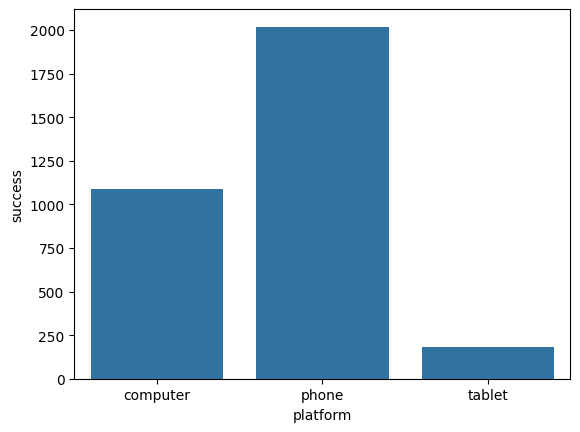

In [202]:
sns.barplot(data=df, x='platform', y='success')

## Шаг 5

Менеджер продукта выдвинул идею, что стоит сфокусироваться не просто на одной платформе, но ещё и только на сегменте премиум. **Определите, какая платформа пользуется наибольшей популярностью среди премиум-клиентов**.

In [203]:
df = pd.merge(user_data, logs, on='client')
df.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [204]:
df = df.query('premium == True')\
    .groupby('platform', as_index=False)\
    .agg({'success':'count'})\
    .sort_values('success')


In [205]:
df

,platform,success
2,tablet,24
0,computer,150
1,phone,246


<Axes: xlabel='success', ylabel='platform'>

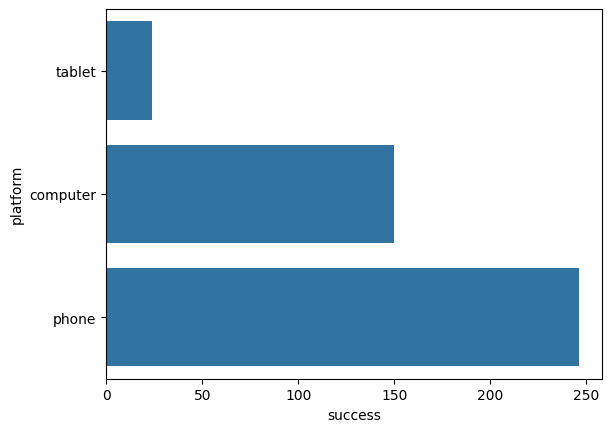

In [206]:
sns.barplot(data=df, y='platform', x='success')

## Шаг 6

Самую популярную платформу среди премиум-клиентов определили, но менеджер хочет посмотреть, насколько она более востребованная, чем остальные платформы. Сравнивать числа удобнее не в таблице, а на графике. **С помощью модуля `pyplot` библиотеки `matplotlib` постройте график, демонстрирующий количество ответов премиум-клиентов на каждой платформе**. Выберите наиболее похожий график на тот, что получился у вас.  
*Если на графике не видны значения на осях, используйте светлую тему в JupyterHub или посмотрите графики на LMS*

A
![A](https://storage.yandexcloud.net/klms-public/production/learning-content/455/4133/35503/98839/469654/A.png)

B
![B](https://storage.yandexcloud.net/klms-public/production/learning-content/455/4133/35503/98839/469654/B.png)

C
![C](https://storage.yandexcloud.net/klms-public/production/learning-content/455/4133/35503/98839/469654/C.png)

## Шаг 7

Продожим раскручивать идею о том, что нашей команде стоит сфокусироваться на работе именно с премиум-клиентами. Посмотрите на долю неуспешных ответов от всего количества ответов — отдельно у премиум и обычных клиентов. **У какой категории клиентов доля неуспешных ответов выше?**

Варианты ответа:
- премиум  
- обычные

In [207]:
df_merged = pd.merge(user_data, logs, on='client')
df_merged.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [214]:
df = df_merged.groupby(['premium', 'success'], as_index=False).agg({'client':'count'}).pivot(index='premium', columns='success', values='client')
df

success,False,True
premium,,
False,775,2244
True,117,303


In [219]:
df['dolya'] = df[False]/(df[True]+df[False])

In [220]:
df

success,False,True,dolya
premium,,,
False,775,2244,0.256708
True,117,303,0.278571


## Шаг 8

У команды всё ещё есть сомнения по поводу работы только с премиум-клиентами. Посмотрим, как возраст премиум-клиентов отличается от возраста обычных. **Для сравнения распределения возраста у премиум и обычных клиентов постройте две гистограммы в одном пространстве, используя функцию `plt.subplot()` из библиотеки `matplotlib`**. В обоих графиках по оси х должен идти возраст, а по оси у - количество клиентов с таким возрастом.

Выберите верные утверждения:  
- премиум-клиентов возраста примерно 35-39 лет больше, чем обычных клиентов этого же возраста
- премиум-клиентов возраста примерно 35-39 лет меньше, чем обычных клиентов этого же возраста
- у премиум-клиентов в каждую категорию возраста (столбец) попадает абсолютно одинаковое количество клиентов
- у обычных клиентов в каждую категорию возраста (столбец) попадает абсолютно одинаковое количество клиентов
- среди премиум-клиентов больше тех, кому примерно 25-30 лет, чем тех, кому примерно 20-25 лет
- среди премиум-клиентов меньше тех, кому примерно 25-30 лет, чем тех, кому примерно 20-25 лет
- у нас чуть больше 40 премиум-клиентов возраста ориентировочно 65-69 лет
- у нас около 400 премиум-клиентов возраста ориентировочно 65-69 лет

In [225]:
import matplotlib.pyplot as plt

(array([276., 408., 295., 279., 282., 334., 285., 245., 235., 380.]),
 array([20. , 24.9, 29.8, 34.7, 39.6, 44.5, 49.4, 54.3, 59.2, 64.1, 69. ]),
 <BarContainer object of 10 artists>)

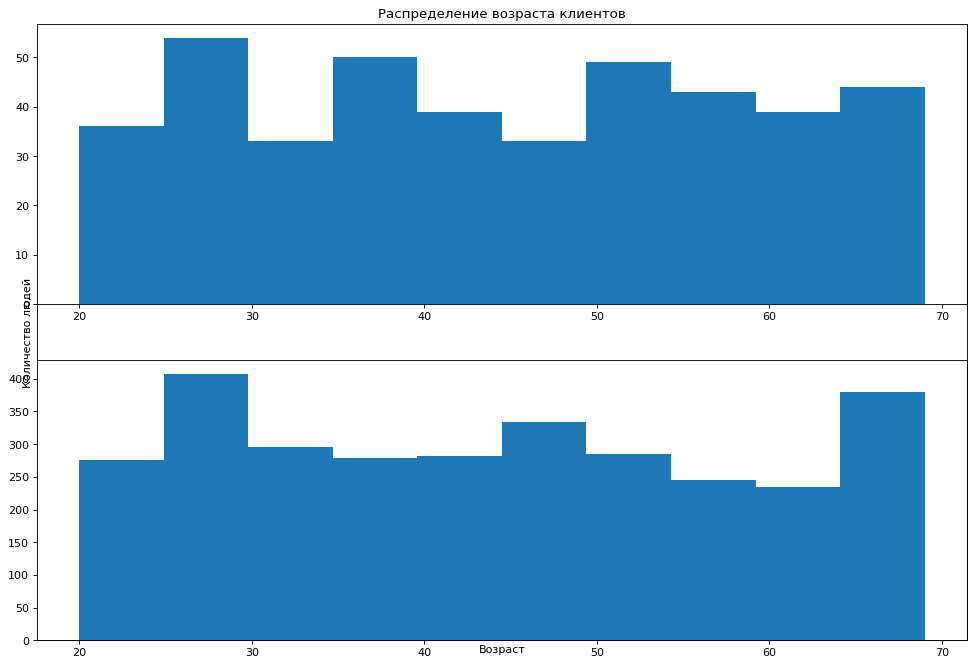

In [252]:
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)

plt.title('Распределение возраста клиентов')
plt.ylabel('Количество людей')
plt.xlabel('Возраст')
plt.xticks([])
plt.yticks([])
plt.grid(True)
plt.subplot(2,1, 1)
plt.hist(df_merged.query('premium == True').age)
plt.subplot(2,1, 2)
plt.hist(df_merged.query('premium == False').age)




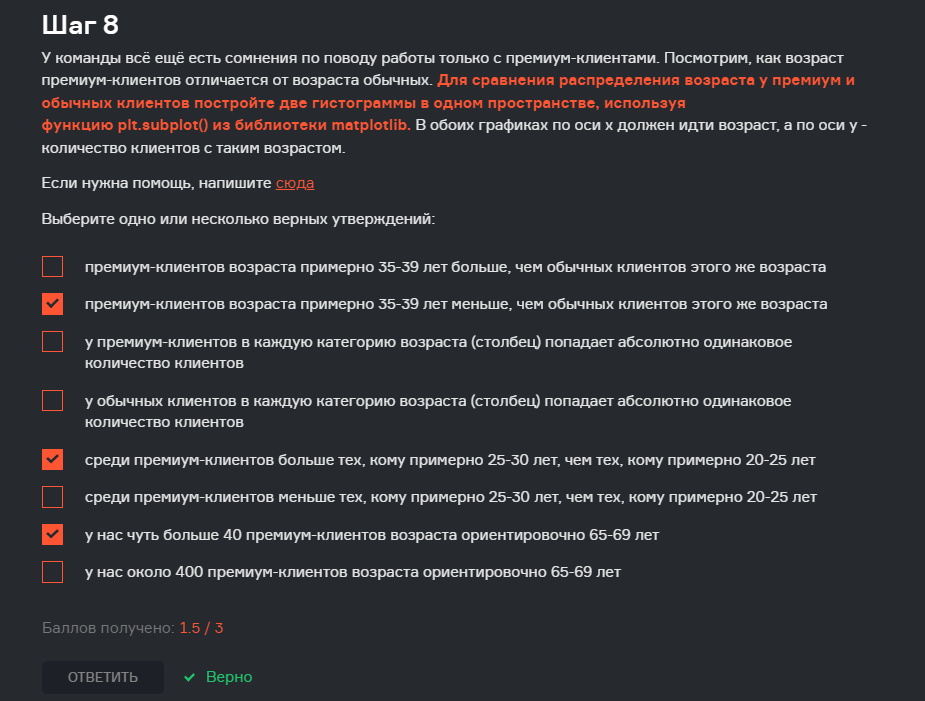

## Шаг 9

Посмотрев на аналитику по премиум-клиентам, команда стартапа решила всё-таки работать со всеми категориями клиентов и в первую очередь обратить внимание на число успешных и неуспешных ответов. Так ваша работа повлияла на работу всей команды. Но не время останавливаться!

**Постройте график, отражающий распределение количества успешных ответов на пользователя.** По оси `x` должно идти число успешных ответов, а по оси `y` - сколько пользователей дали такое число успешных ответов

**Выберите одно или несколько верных утверждений**

In [253]:
logs.query('success == True')

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
5,41928,True,phone,1585446772
...,...,...,...,...
4493,92584,True,computer,1585408896
4494,95152,True,computer,1585420263
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121


In [276]:
df = logs\
    .query('success == True')\
    .client.value_counts()


In [277]:
df

client
28719    41
52870    41
61468    41
61473    41
12179    41
         ..
70028     1
37123     1
73522     1
38359     1
40921     1
Name: count, Length: 2845, dtype: int64

<Axes: xlabel='count', ylabel='count'>

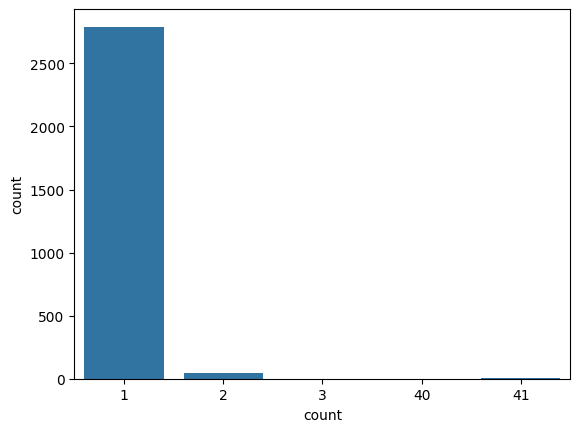

In [281]:
sns.countplot(x = df)


## Шаг 10

Копнем глубже и узнаем, **клиенты какого возраста дали наибольшее количество успешных ответов на компьютере?** Визуализируйте число успешных ответов, сделанных на платформе `computer`, в зависимости от возраста. По оси `x` будет идти возраст, по оси `y` – число успешных ответов.

Если из-за размера график получается нечитаемым, можно добавить `plt.figure(figsize=(12, 8))` в начало соответствующей ячейки c кодом построения визуализации

In [283]:
df = df_merged.query('platform == "computer" and success == True')
df

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108
...,...,...,...,...,...,...
3414,93718,False,63,True,computer,1585466349
3415,13688,True,66,True,computer,1585453923
3417,68348,False,69,True,computer,1585456739
3427,9450,False,34,True,computer,1585446079


<Axes: xlabel='age', ylabel='count'>

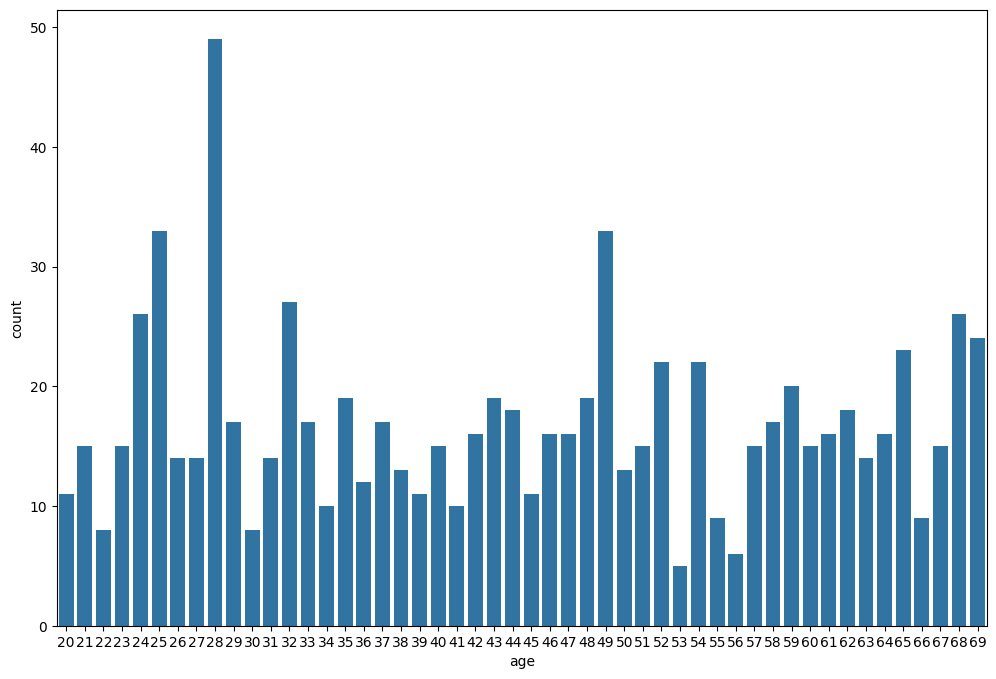

In [287]:
plt.figure(figsize=(12, 8))
sns.countplot(x = df.age)


## Итоги

Итак, вы собрали ту аналитику, которая на данном этапе требовалась команде геймдев-стартапа для принятия решения о векторе развития продукта. В процессе вы отработали навыки объединения данных и изменения их формы, а также построения графиков и принятия решений на основе визуализации.